# ALDS Tutorial 2: Containers, zoeken, sorteren

Ja!!! Welkom terug! Ik hoop dat jullie week 1 goed door zijn gekomen en weer zin hebben in week 2! 

Laten we eerst weer eens even beginnen met het doen van de nodige imports: 

In [8]:
import sys
assert sys.version_info.major == 3, "You need python 3." #Asserts zijn handig: ingebouwde unit-testjes in Python
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython
assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))

from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats
import random

Python version is (3, 8, 5, 'final', 0) -> okay
IPython version is (7, 19, 0, '') -> okay


Deze tutorial gaat weer gebruik maken van numpy arrays (np.array). Dit is een ontzettend fijn datatype dat erg geoptimaliseerd is (zowel qua memory, als runtime voor allerhande standaardfuncties). Bovendien is er gebruik van numpy arrays enorm flexibel. Deze datastructuur is dusdanig veel gebruikt en heeft zoveel impact gehad dat er een Nature-artikel (dat is één van de belangrijkste wetenschappelijke tijdschriften) over is verschenen: https://www.nature.com/articles/s41586-020-2649-2 (Zeker de moeite waard om eens te lezen). 

Qua tips voor het gebruik van numpy arrays raad ik de volgende youtube tutorial aan: https://www.youtube.com/watch?v=8Mpc9ukltVA

Wij gaan nu een aantal opdrachten doen waarbij we gebruik gaan maken van deze numpy arrays om datastructuren te maken op kop van een array. (Deze gebruik ik liever dan de Python list, omdat numpy arrays zoals gezegd echte arrays zijn.) 

## Opgave 1: een eigen Stack (een plek op silicoon)

Schrijf een eigen Stack-klasse op basis van een numpy array, waar alleen integers in mogen. Je mag zelf kiezen welk soort integers want in numpy mag je kiezen hoe groot de ints mogen zijn en of ze signed of unsigned moeten zijn. Je kan hiervoor dtype gebruiken bij het aanmaken van de array, bijvoorbeeld: dtype='int16' levert 16bit signed integers op. 

De Stack heeft een fixed capacity (de grootte van de array). Implementeer een klasse MyStack, waar in ieder geval de volgende functies in verwerkt zijn. Zet bij elke functie van de klasse een runtime-complexity analyse (dus de complexiteit middels de big-Oh notatie, en een korte uitleg daarvan). 
* push(int) (Zet een item op "kop" van de lijst - je mag zelf kiezen hoe de Stack groeit, return een boolean die zegt of het pushen gelukt it. Pushen lukt namelijk niet als de maximale capaciteit bereikt is.)
* pop() (Return en verwijder het element dat nu op kop van de Stack staat) 
* peek() (Return het element op kop van de Stack, maar verwijder hem niet) 
* isEmpty() (Return of de Stack nu leeg is, d.w.z., er nu geen elementen in staan)
* isFull() (Return of the maxCapacity bereikt is)

Daarna willen we graag de capaciteit kunnen vergroten. Voeg een functie toe 
* doubleCapacity() (Verdubbel de capaciteit van de Stack. Zorg ervoor dat de volgorde van de elementen op de Stack in tact blijft.) Wat is de runtime complexity (big-Oh) van deze functie? Leg dit uit in het commentaar.

Bedenk goede unit tests om de werking van de Stack te testen. Gebruik hiervoor het Python-commando "assert" (voor een voorbeeld, zie vorige tutorial). 

In [9]:
class myStack():
    def __init__(self, max_capacity):
        self.max_capacity = max_capacity
        self.stack = [0]*max_capacity
        self.stack_pointer = -1
    
    # O(1), Door het gebruik van een stackPointer hoeven we niet te loopen door de "stack".
    def push(self, item):
        if self.isFull():
            return False
        self.stack_pointer += 1
        self.stack[self.stack_pointer] = item
        return True
    
    # O(1), Door het gebruik van een stackPointer hoeven we niet te loopen door de "stack".
    def pop(self):
        if not self.isEmpty():
            item = self.stack[self.stack_pointer]
            self.stack[self.stack_pointer] = 0
            self.stack_pointer -= 1
            return item
        return None
    
    # O(1), Door het gebruik van een stackPointer hoeven we niet te loopen door de "stack".
    def peek(self):
        if not self.isEmpty():
            return self.stack[self.stack_pointer]
        return None
        
    # O(1)
    def isEmpty(self):
        return (self.stack_pointer == -1)
    
    # O(1)
    def isFull(self):
        return (self.stack_pointer == self.max_capacity-1)
    
    # O(n), Om de max_capacity te vergroten moeten we ervoor zorgen dat er een niewe lijst wordt gemaakt
    # die 2x zo groot is. We slaan de huidige stack tijdelijk op, maken een nieuwe lijst van zeros
    # en kopiëren vervolgens de tijdelijke stack op de niewe, vergrote stack.
    def doubleCapacity(self):
        tmp_stack = self.stack
        tmp_max_capacity = self.max_capacity
        
        self.max_capacity *= 2
        self.stack = [0]*self.max_capacity
        for i in range(tmp_max_capacity):
            self.stack[i] = tmp_stack[i]
        
        return True
        
    def __str__(self):
        return self.stack.__str__()
    
    def __repr__(self):
        return self.__str__()
    
    
stack = myStack(5)

assert stack.isEmpty() == 1, "De stack is nog vol!"

stack.push(3)
stack.push(8)
stack.push(2)

assert stack.peek() == 2, "Peek werkt niet goed!"

stack.pop()

assert stack.peek() == 8, "Peek werkt niet goed!"

stack.push(9)
stack.push(4)
stack.push(9)

assert stack.isFull() == 1, "De stack is nog niet vol!"

stack.doubleCapacity()

assert stack.isFull() == 0, "De stack is vol!"

stack.push(9)
stack.push(1)
stack.push(2)

assert stack.isEmpty() == 0, "De stack is nog niet leeg"

print(stack)


[3, 8, 9, 4, 9, 9, 1, 2, 0, 0]


## Opgave 2: Quick-sort en meer Quick-sort

De runtime van Quick-sort is erg afhankelijk van de keuze van de pivot. We gaan in deze opgave hiervoor verschillende alternatieven bekijken en vergelijken om te zien wat daar het effect van is; zowel theoretisch (in termen van de big-Oh) als in de praktijk (door runtime te meten). 

* Schrijf een functie voor het sorteren van een numpy array met Quicksort. (Zie Algoritmes 16 en 17 van hoofdstuk 7.3 in de reader)
* Pas de functie zo aan dat het aantal keer dat twee waardes vergeleken worden ook wordt gereturnt (naast de gesorteerde lijst). (NB: in Python kan je meerdere dingen tegelijk teruggeven bij een functie.) 
* Schrijf een test-functie, waarbij de gemiddelde waarde van het (bovenstaande) aantal vergelijkingen wordt geschat, door het algoritme X keer voor verschillende random lijsten van lengte L te runnen. Geef naast dit gemiddelde ook de standaardafwijking (standard deviation) terug.  
* Schrijf nu een tweede versie van quick-sort, maar nu zo dat de pivot anders wordt gekozen. Namelijk, neem de minimale waarde van tussen (en inclusief) $lo$ en $hi$ (in de array $a$) als de pivot. Geef wederom het aantal vergelijkingen terug. 
* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, en plot de resultaten middels matplotlib.pyplot (zoals we ook in de vorige tutorial hadden gedaan), vergeet niet de standaardafwijking mee te plotten als een error region. 
* Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-Oh) van QuickSort. 
* Laten we nog eens iets anders proberen voor de pivot. Schrijf nog een alternatieve versie van quicksort die op regel 1 in plaats van een random pivot of de minimumwaarde, nu de **mediaan** van de elementen tussen $lo$ and $hi$ (uit $a$) pakt. Voor de mediaan pakken we de middelste waarde. Bijvoorbeeld, de mediaan van {1, 7, 3, 8, 3, 9, 6} is 6. In Python 3 is dit geïmplementeerd met de standaardfunctie **median()** in de **statistics** module. 
* Vergelijk deze nieuwe versie door middel van je testfunctie voor verschillende groottes van inputlijsten, en voeg de resultaten toe aan je plot. 
* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
* Licht de resultaten toe, en verklaar de verschillen?
* Wat het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-Oh om hier antwoord op te geven.) 

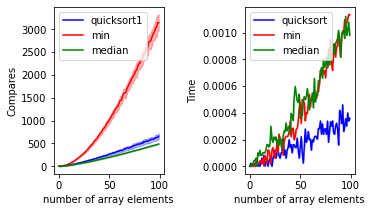

In [10]:
def quickSort1( arr, lo, hi, compare_counter = 0 ):
    if lo >= hi:
        return arr, compare_counter
    
    p, c = partition1( arr, lo, hi, compare_counter)
    arr, c1 = quickSort1( arr, lo, (p-1), c)
    arr, c2 = quickSort1( arr, (p+1), hi, c1)
    
    return arr, c2

def partition1( arr, lo, hi, compare_counter ):
    pivot = arr[hi]
    i = lo
    for j in range(lo, hi):
        compare_counter += 1
        if( arr[j] <= pivot):
            arr[i], arr[j] = arr[j], arr[i]
            i = i + 1
    arr[i], arr[hi] = arr[hi], arr[i]
    return i, compare_counter


def test_fucntion(quick_sort_func, X, N):
    mean_func = []
    
    for i in range(X):
        rand_length = np.randint(0, 100, 1, "uint32")[0]
        arr = np.randint(0, 100, rand_length, "uint32t")
        
        mean_func.append( quick_sort_func(arr, 0, rand_legnth-1)[1] )
    
    return stats.mean(mean_func), stats.stdev(mean_func)
    

def quickSort2( arr, lo, hi, compare_counter = 0 ):
    if lo >= hi:
        return arr, compare_counter
    
    p, c = partition2( arr, lo, hi, compare_counter)
    arr, c1 = quickSort2( arr, p, hi, c)
    return arr, c1

def partition2( arr, lo, hi, compare_counter ):
    pivot = min(arr[lo:hi+1])

    i = lo
    for j in range(lo, hi+1):
        compare_counter += 1
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i = i + 1
    return i, compare_counter

def quickSort3( arr, lo, hi, compare_counter = 0 ):
    if lo >= hi:
        return arr, compare_counter
    
    p, c = partition3( arr, lo, hi, compare_counter)
    arr, c1 = quickSort3( arr, lo, (p-1), c)
    arr, c2 = quickSort3( arr, (p+1), hi, c1)
    return arr, c2

def partition3( arr, lo, hi, compare_counter ):
    array = arr[lo:(hi+1)]
    n = len(array)

    if n%2 == 0:
        array = np.append(array, array[n-1])
        
    pivot = stats.median(array)
    pivotIndex = np.where(array == pivot)[0][0] + lo
    arr[hi], arr[pivotIndex] = arr[pivotIndex], arr[hi]
    

    i = lo
    for j in range(lo, hi):
        compare_counter += 1
        if arr[j] <= pivot :
            arr[i], arr[j] = arr[j], arr[i]
            i+=1
            
    arr[i], arr[hi] = arr[hi], arr[i]
    return i, compare_counter



mean_compares_quicksort1      = []
stdev_compares_quicksort1     = []
mean_time_quicksort1          = []
stdev_time_quicksort1         = []

mean_compares_quicksort2      = []
stdev_compares_quicksort2     = []
mean_time_quicksort2          = []
stdev_time_quicksort2         = []

mean_compares_quicksort3      = []
stdev_compares_quicksort3     = []
mean_time_quicksort3          = []
stdev_time_quicksort3         = []

meetpunten = list(range(0,100))

for i in meetpunten:
    compares_qs1  = []
    compares_qs2 = []
    compares_qs3 = []
    
    time_qs1 = []
    time_qs2 = []
    time_qs3 = []

    
    for j in range(50): 
        
        arr = np.random.randint(0, high=100, size=i, dtype='uint16')
        
        t1 = time.time()
        res, compares1 = quickSort1(arr, 0, (i-1))
        t2 = time.time()
        time_qs1.append(t2-t1)
        compares_qs1.append(compares1)
        
        t1 = time.time()
        res, compares1 = quickSort2(arr, 0, (i-1))
        t2 = time.time()
        time_qs2.append(t2-t1)
        compares_qs2.append(compares1)
        
        t1 = time.time()
        res, compares1 = quickSort3(arr, 0, (i-1))
        t2 = time.time()
        time_qs3.append(t2-t1)
        compares_qs3.append(compares1)
                         
    mean_compares_quicksort1.append(stats.mean(compares_qs1))
    stdev_compares_quicksort1.append(stats.stdev(compares_qs1))
    mean_time_quicksort1.append(stats.mean(time_qs1))
    stdev_time_quicksort1.append(stats.stdev(time_qs1))
    
    mean_compares_quicksort2.append(stats.mean(compares_qs2))
    stdev_compares_quicksort2.append(stats.stdev(compares_qs2))
    mean_time_quicksort2.append(stats.mean(time_qs2))
    stdev_time_quicksort2.append(stats.stdev(time_qs2))
    
    mean_compares_quicksort3.append(stats.mean(compares_qs3))
    stdev_compares_quicksort3.append(stats.stdev(compares_qs3))
    mean_time_quicksort3.append(stats.mean(time_qs3))
    stdev_time_quicksort3.append(stats.stdev(time_qs3))
    


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)

ax1.plot(meetpunten, mean_compares_quicksort1, 
         'b-', label="quicksort1")
ax1.fill_between(meetpunten, 
                 np.array(mean_compares_quicksort1)-np.array(stdev_compares_quicksort1), 
                 np.array(mean_compares_quicksort1)+np.array(stdev_compares_quicksort1), 
                 color='b', alpha=0.3)


ax1.plot(meetpunten, mean_compares_quicksort2, 
         'r-', label="min")
ax1.fill_between(meetpunten, 
                 np.array(mean_compares_quicksort2)-np.array(stdev_compares_quicksort2), 
                 np.array(mean_compares_quicksort2)+np.array(stdev_compares_quicksort2), 
                 color='r', alpha=0.3)

ax1.plot(meetpunten, mean_compares_quicksort3, 
         'g-', label="median")
ax1.fill_between(meetpunten, 
                 np.array(mean_compares_quicksort3)-np.array(stdev_compares_quicksort3), 
                 np.array(mean_compares_quicksort3)+np.array(stdev_compares_quicksort3), 
                 color='g', alpha=0.3)
ax1.set(xlabel="number of array elements", ylabel="Compares")
ax1.legend(loc="upper left")


ax2.plot(meetpunten, mean_time_quicksort1, 
         'b-', label="quicksort")
ax2.fill_between(meetpunten, 
                 np.array(mean_time_quicksort1),#-np.array(stdev_time_quicksort1), 
                 np.array(mean_time_quicksort1),#+np.array(stdev_time_quicksort1), 
                 color='b', alpha=0.3)


ax2.plot(meetpunten, mean_time_quicksort2, 
         'r-', label="min")
ax2.fill_between(meetpunten, 
                 np.array(mean_time_quicksort2),#-np.array(stdev_time_quicksort2), 
                 np.array(mean_time_quicksort2),#+np.array(stdev_time_quicksort2), 
                 color='r', alpha=0.3)

ax2.plot(meetpunten, mean_time_quicksort3, 
         'g-', label="median")
ax2.fill_between(meetpunten, 
                 np.array(mean_time_quicksort3),#-np.array(stdev_time_quicksort3), 
                 np.array(mean_time_quicksort3),#+np.array(stdev_time_quicksort3), 
                 color='g', alpha=0.3)
ax2.set(xlabel="number of array elements", ylabel="Time")
ax2.legend(loc="upper left")




plt.show()

*beantwoordt hier de vragen van opgave 2*

## Opgave 3: Priority Queue (waarin we zelf een datastructuur gaan kiezen om een andere datastructuur bovenop te bouwen)

**NB: voor deze opgave heb je een partner nodig. (Nee, geen romantische partner, een practicumpartner die ook deze cursus volgt.) Neem contact op met het groepje waarin je bent ingedeeld voor de besprekingsmomenten, en bespreek vooraf de keuzes voor deze opgave (qua datastructuur). Het is van belang dat niet iedereen dezelfde datastructuur pakt namelijk, anders valt er weinig te vergelijken. *Als je niet bent ingedeeld, of je je groepsgenoten reageren niet, neem dan zsm even contactop met Marius of Diederik, dan zoeken we naar een oplossing.*  **

PriorityQueues zijn een datastructuur met de volgende eigenschappen: 
* Het is een wachtrij, waarbij elk element een *prioriteit* toegekend krijgt. Deze prioriteit is meestal een integer, (maar soms kan het ook een float zijn). 
* Bij gelijke *prioriteit* (dus bijvoorbeeld, alle elementen in de rij hebben prioriteit *1*) gedraagt een priority queue zich net zoals een queue; first in first out (FIFO)
* Echter, als er een element met een hogere prioriteit wordt toegevoegd gaat deze eerst. 

Priority Queues worden veel gebruikt bij dingen als task-scheduling binnen applicaties, het OS, of de cloud (https://www.researchgate.net/publication/257726215_A_Priority_Based_Job_Scheduling_Algorithm_in_Cloud_Computing), wachtrijen voor verzenden (telefoongespreken zijn belangrijker dan e-mails want ze moeten real-time) (https://patentimages.storage.googleapis.com/72/1a/c2/7cd0205566e125/US7310670.pdf), maar ook bijvoorbeeld binnen zelf-lerende systemen door te kijken naar welke "ervaringen" de meeste leeropbrengst zouden opleveren (en die dan eerst verwerken) zodat het systeem sneller leert (https://link.springer.com/content/pdf/10.1007/BF00993104.pdf). 

In deze opgave gaan we kijken naar hoe we een priority kunnen bouwen, bovenop eenvoudigere datastructuren. De datastructuur onliggend aan een PriorityQueue zouden we namelijk wel eens anders moeten kunnen willen kiezen dan een gewone queue: het inserten van nieuwe elementen (die nu midden in de queue zouden kunnen komen) is namelijk een stuk lastiger (we zouden makkelijk elementen moeten kunnen toevoegen in het midden van de priority queue).

Enkele tips hierbij: kijk alvast eens naar recursieve datastructuren (volgend college) zoals de doubly linked list. Of verzin zelf een slimme list om priorities er goed in te krijgen. (Je zou bijvoorbeeld voordeel kunnen hebben als je van te voren al weet dat er bijvoorbeeld tien mogelijke prioriteiten zijn - als je zo'n aanname wilt maken, geef dit dan duidelijk aan in het commentaar.) Als je helemaal los wilt gaan, kijk dan eens naar de heap datastructuur (ook wel een heap-boom, https://en.wikipedia.org/wiki/Heap_(data_structure) , NB: dit is niet hetzelfde als de "heap" als rereserveerde geheugenruimte op een chip; daar wordt ongelukkigerwijs helaas dezelfde naam voor gebruikt, maar is iets compleet anders.)

* Onderzoek samen met je practicumpartner mogelijke keuzes voor de onderliggende datastructuur voor een priority queue, en spreek af wie welke gaat doen. (Twee verschillenden)
* Leg voor de keuze die jij zelf gaat implementeren waarom jullie deze gekozen hebben. 
* Implementeer de priority queue met de gekozen datastructuur, en daarbij de volgende functies: 
    * **queue(v, p)** adds value $v$ with priority $p$ to the queue.
    * **dequeue()** returns the value with the highest priority and removes the element from the queue.
    * **contains(v)** returns \textit{True} if and only if the queue contains value $v$.
    * **remove(e)** removes all elements with value $v$ from the queue.
* Analyseer de time complexity van deze priority queue functies zoals je ze hebt geïmplementeerd. Zet je analyse in het commentaar bij de code (zowel de argumentatie als het big-Oh resultaat).
* Schrijf een testfunctie voor alle bovenstaande functies om de runtime te meten bij het inserten (queue) van X random waardes met random prioriteiten, het dequeuen van al deze X waarden, het vinden (contains) van Y random waarden (uiteraard kleiner dan X, en te testen vóór alles gedequeued is), en het removen van Z waarden (wederom kleiner dan X en het best los te testen onafhankelijk van de andere functies). 
* Neem nu de implementatie over van je practicumpartner in een aparte cell, en maak daaronder een runtimevergelijking voor alle vier de functies. Plot de resultaten met matplotlib.pyplot, met zowel de gemiddelden als de standaardafwijken (als error regions), zoals we gewend zijn van de eerste tutorial. 
* Welke verschillen zie je in de plotjes? Kan je dit verklaren? Zijn er bijvoorbeeld verschillen qua time complexity?


De keuze om een stack-pQueue te maken was met name omdat ik niet een standaard, "ik sorteer een array op basis van indexes", wilde maken, maar iets uitdagenders. We hebben immers al een stack gemaakt eerder in deze tutorial. 

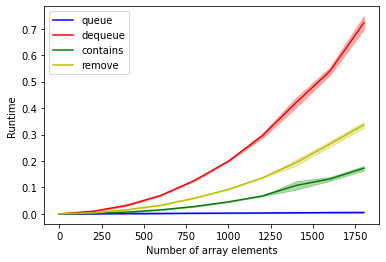

In [36]:

# This class is moreless for the representation of an item in my pQueue.
# Now I can implement the __str__ and __repr__ :)
class task():
    def __init__(self, value = 0, priority = 0, n = 0):
        self.value = value
        self.prio = priority
        self.N = n
        
    def __str__(self):
        return '({}, {})'.format(self.value, self.prio)
    
    def __repr__(self):
        return self.__str__()
        
# This is a 'priorityQueue' class
# My implementation is based on the 'stack' from previous exercise.
# There is a major flaw using the stack in this structure. This has to do with the way the stack works.
# If we have an pQueue with multiple 'tasks' with the same priority. How do we know who came first?
# The queue needs to be FIFO, but the stack doesn't care about that. The stack is a LIFO.
# Allow me to set an example:
#
#   stack = [0, 0, 0, 0, 0]
#   task('value', 'priority')
#   queue<task> = [('fifth', 2), ('fourth, 2), ('third', 2), ('second', 2), ('first', 2)]
#
#   When we remove f.e. the element with 'third' (by using the pQueue.remove('third')) we get the next situation:
#   
#   stack = [2, 0, 0, 0, 0]
#   task('value', 'priority')
#   queue<task> = [('fifth', 2), ('fourth, 2), (0, 0), ('second', 2), ('first', 2)]
#
#   If we now add a new 'task' with the same priority, we end up with a queue which does not follow the FIFO anymore:
#   
#   stack = [0, 0, 0, 0, 0]
#   task('value', 'priority')
#   queue<task> = [('fifth', 2), ('fourth, 2), ('sixth', 2), ('second', 2), ('first', 2)]
#
#   There are a couple solutions from this problem, but at a major computational hit.
#       - Make sure we dont have duplicate priorities (we cant ask the user to do that, so this means we need to check the queue for existing priorities etc.)
#       - Make sure the queue is always sorted by priority 
#       - Make sure there is at least one value of the 'task' always different so we can differntiate the different tasks based on that specific value
#               - This could be time or just a counter
#
#   obviously, the last one is my solution. I added a 'pop_counter'. Everytime I pop a new index from the stack, I increment this value. This makes it so
#   my 'tasks' always have at least one different value based on the 'time' of the program.
class pQueue:
    def __init__(self, max_capacity):
        self.max_capacity = max_capacity
        self.array = [task()]*max_capacity
        self.available_indexes = myStack(max_capacity)
        self.pop_counter = 0
        for i in range(max_capacity):
            self.available_indexes.push(i)
    
    # O(1), Based on a index-'pop' from the stack we put a new 'task' in the queue.
    def queue(self, v, p):
        
        # no more available indexes on the stack
        if self.available_indexes.isEmpty():
            return False
        
        # Pop an index from the stack and use the index to assign a new task to an index in the queue
        self.array[self.available_indexes.pop()] = task(v, p, self.pop_counter)
        self.pop_counter += 1
        return True
    
    # O(n), Loop over all the elements in the queue to get the highest priority.
    def dequeue(self):
        # All the indexes are available so the queue is empty...
        if self.available_indexes.isFull():
            return None
        
        # placeholder: (index, element in queue on index)
        # We cannot assign  a value based on a 'random' element in the queue, 
        # becasue we don't know wether the priority is 0...
        highest_prio = (0, None)
        
        for (i, elem) in enumerate(self.array):
            if elem.prio != 0:
                if highest_prio[1] == None or elem.prio < highest_prio[1].prio:
                    highest_prio = (i, elem)
                
                elif elem.prio == highest_prio[1].prio:
                    if elem.N < highest_prio[1].N:
                        highest_prio = (i, elem)
        
        highest_prio_value = highest_prio[1].value
        self.array[highest_prio[0]] = task()
        self.available_indexes.push(highest_prio[0])
        return highest_prio_value
    
    # O(n), Loop through the queue to check wether the value is already in the queue
    def contains(self, v):
        for i in self.array:
            if i.value == v:
                return True
        return False
    
    # O(n), Loop through the queue to find all occurences of value e and 'replace' them with an empty 'tasks'
    def remove(self, e):
        for i in range(self.max_capacity):
            if self.array[i].value == e:
                self.array[i] = task()
                self.available_indexes.push(i)

    def __str__(self):
        return self.array.__str__()
    
    def __repr__(self):
        return self.__str__() 

                              
mean_queue=[]
stdev_queue=[]
mean_dequeue=[]
stdev_dequeue=[]
mean_contains=[]
stdev_contains=[]
mean_remove=[]
stdev_remove=[]

meetpunten = list(range(1, 2000, 200))

for i in meetpunten:
    std  =[] 
    std2 =[] 
    std3 =[]  
    std4 =[] 
    
    for x in range(5):
        #Queue test
        myqueue = pQueue(i)
        t1 = time.time()
        for j in range(i): 
            myqueue.queue(random.randint(1, 100), random.randint(1, 10))
        t2 = time.time()
        std.append(t2 - t1)
        
        #Contains test
        t1 = time.time()
        for j in range(i):
            myqueue.contains(j)
        t2 = time.time()
        std3.append(t2 - t1)
            
        #Remove test
        t1 = time.time()
        for j in range(i):
            myqueue.remove(j)
        t2 = time.time()
        std4.append(t2 - t1)
        
        myqueue = pQueue(i) # refill array
        for j in range(i): 
            myqueue.queue(random.randint(1, 100), random.randint(1, 10))
        
        #Dequeue test
        t1 = time.time()
        for j in range(i):
            myqueue.dequeue()
        t2 = time.time()
        std2.append(t2 - t1) 
        

    mean_queue.append(stats.mean(std))
    stdev_queue.append(stats.stdev(std))
    mean_dequeue.append(stats.mean(std2))
    stdev_dequeue.append(stats.stdev(std2))
    mean_contains.append(stats.mean(std3))
    stdev_contains.append(stats.stdev(std3))
    mean_remove.append(stats.mean(std4))
    stdev_remove.append(stats.stdev(std4))
    
    
plt.plot(meetpunten, mean_queue, 'b-')      #Blue
plt.fill_between(meetpunten, np.array(mean_queue)-np.array(stdev_queue), np.array(mean_queue)+np.array(stdev_queue), color='b', alpha=0.3)
plt.plot(meetpunten, mean_dequeue, 'r-')    #Red
plt.fill_between(meetpunten, np.array(mean_dequeue)-np.array(stdev_dequeue), np.array(mean_dequeue)+np.array(stdev_dequeue), color='r', alpha=0.3)
plt.plot(meetpunten, mean_contains, 'g-')   #Green
plt.fill_between(meetpunten, np.array(mean_contains)-np.array(stdev_contains), np.array(mean_contains)+np.array(stdev_contains), color='g', alpha=0.3)
plt.plot(meetpunten, mean_remove, 'y-')     #Yellow
plt.fill_between(meetpunten, np.array(mean_remove)-np.array(stdev_remove), np.array(mean_remove)+np.array(stdev_remove), color='y', alpha=0.3)
plt.xlabel("Number of array elements")
plt.ylabel("Runtime")
plt.legend(["queue", "dequeue","contains", "remove"])
plt.show()                              

In [ ]:
#neem hier de code van je practicumpartner over (NB: misschien zul je de class even moeten hernoemen
#maar het is wel handig om dezelfde functienamen te gebruiken)

In [ ]:
#schrijf hier de experimentele vergelijking van jullie vier methodes, en de code om de plotjes te maken

*verklaar hier de verschillen in runtime tussen de twee implementaties (met verschillende onderliggende datastructuur)*